In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import math
from sympy import symbols, Eq, solve
#Importa Runge Kutta
#from RK_v2 import RungeKutta4ord

#Importa sistema
#from Model_Lorenz_v0 import lr_model
#from Model_Lorenz_v2 import lr_model
#from Model_Pendulo_Duplo_v0 import pendulum_model
#from Model_HIV_v0 import model

#Importa Poincaré
#from poincare_v1 import poincare

# Ferramentas

## Runge Kutta

In [15]:
def RungeKutta4ord (model, s0, t0, tf, dt):
        
        
        #Runge Kutta
#recebe um modelo no formato Model(tempo, s(array cuja dim é o número de variáveis do sistema))
#Metódo Runge Kutta
        
        t=np.arange(t0, tf, dt)
        
        #'comprimento' temporal
        nt = t.size
        #dimensão do sistema analisado (número de varíaveis da equação)
        ''' quando se declara como array
        dim = s0.size
        
        '''
        ''' Quando se declara como lista
        dim = len(s0)
        
        '''
        dim = len(s0)
        #esqueleto do matriz solução
        #essa matriz terá dimensão igual a dimensão do sistema (s0.size)
        #e comprimento do tamanho do espaço temporal analisado (nt)
        s = np.zeros((dim,nt))
        
        s[:,0] = s0
                
        for i in range (nt-1): 
            
            k1 = dt * model(t[i], s[:,i])
            k2 = dt * model(t[i] + dt/2, s[:,i] + k1/2)
            k3 = dt * model(t[i] + dt/2, s[:,i] + k2/2)
            k4 = dt * model(t[i] + dt, s[:,i] + k3)
            
            ds = (k1 + 2*k2 + 2*k3 +k4)/6
            
            s[:,i+1] = s[:,i] + ds
        
        return s, t
                

## Secção de Poincaré

In [16]:
def poincare (t , s, pos, val, error):
    '''
    Função recebe 
    s: solução do sistema que se quer analisar
    t: vetor tempo referente a essa solução
    pos: 0 indica que o plano será perpendicualr a x (yz), 1 indica um plano em (xz), 2 indica um plano em xy
    val: indica em que ponto do eixo o plano irá cruzar
    error: parâmetro de erro que indica a "espessura" do plano que vamos considerar
    
    
    
    '''
    nt = t.size
    dim = len(s[:,0])
    
    #seccao = np.zeros((dim,nt))
    # 
    x =[]
    y=[]
    z=[]
    
        
#comprimento' temporal
    if pos > len(s[:,0]) - 1:
        print('Erro: Posicao declarada inválida')
        return
    
    else:
        
        #percorre todos os instantes 
        for i in range (0, len(s[0])-1):
            
            #checa se o ponto analisado está dentro do plano 
            if s[pos,i] <= val + error and s[pos,i] >= val - error:
                x.append(s[0,i])
                y.append(s[1,i])
                z.append(s[2,i])
    

    #print (x)
    #print (seccao)
    return np.array([x,y,z])


In [17]:
def bool_esp ( v, p0, p): 
    '''
    Função avalia se um determinado ponto de uma série (p) está ou não numa região determinada por um plano
    Plano, este, definido por um vetor direcional v e um ponto de referência p0
    Função apenas funciona para espaço tridimensional
    '''
    
    #Equação de um plano, dado um vetor v=(a,b,c) e um ponto p=(x0,y0,z0) é 
    # a(x-x0) +b(y-y0) +c(z-z0) = 0
    #que é o mesmo que: 
    # <v|(x,y,z)>-<v|p0>
    if np.dot (v, p) - np.dot(v,p0)>= 0:
        return True
    
    else:
        return False
    

In [18]:
def ponc_esp_old (s, t, v, p0):
    ''' Função recebe uma série de pontos s, acompanhada de uma série temporal t, e retorna uma lista dos
    pontos médios de toda vez que há um cruzamento pelo plano determinado pelos vetores v e ponto de referencia p0. 
    '''
    nt = t.size
    a = np.array([])
    #s_aux = np.array([])
    #t_aux = np.array([])
    s_aux = []
    t_aux = []
    ver = True #Variavel que verifica se cruzou o plano
    ver_old = True #Variavel que armazena se o ponto anterior cruzou o plano: 
    
    
    for i in range(0,nt): 
        #ver  = bool_esp (v, p0,s[i][:3])
        ver  = bool_esp (v, p0,s[:3,i])


        if i>0 : 
            if ver == True and ver_old == False:
                #a = (s[i][:3]+s[i-1][:3])/2
                #ta = (t[i]+t[i-1])/2
                a = (np.array(s[:3,i])+np.array(s[:3,i-1]))/2
                ta = (t[i]+t[i-1])/2
                
                s_aux.append(a)
                t_aux.append(ta)
                #np.concatenate(s_aux, a)
                #np.concatenate(t_aux, ta)
                
                
                ver_old = ver
            
            else: 
                ver_old = ver
        else: 
            ver_old = ver
        
        
    #return np.array([s_aux, t_aux]) 
    return np.array(s_aux),np.array(t_aux)
        

In [19]:
def ponc_esp (s, t, v, p0):
    ''' Função recebe uma série de pontos s, acompanhada de uma série temporal t, e retorna uma lista dos
    pontos médios de toda vez que há um cruzamento pelo plano determinado pelos vetores v e ponto de referencia p0. 
    '''
    nt = t.size
    a = np.array([])
    #s_aux = np.array([])
    #t_aux = np.array([])
    s_aux = []
    t_aux = []
    ver = True #Variavel que verifica se cruzou o plano
    ver_old = True #Variavel que armazena se o ponto anterior cruzou o plano: 
    
    
    for i in range(0,nt): 
        #ver  = bool_esp (v, p0,s[i][:3])
        ver  = bool_esp (v, p0,s[:3,i])


        if i>0 : 
            if ver == True and ver_old == False:
                #a = (s[i][:3]+s[i-1][:3])/2
                #ta = (t[i]+t[i-1])/2
                #a = (np.array(s[:3,i])+np.array(s[:3,i-1]))/2
                ta = (t[i]+t[i-1])/2
                
                
                #### Como obter interesecção de uma reta e um plano
                alfa = symbols('t')
                #pontos da reta
                p2 = np.array(s[:3,i])
                p1 = np.array(s[:3,i-1])
                
                #equação parametrica da reta
                v_reta = (p2-p1)*alfa +p1
                
                
                # parametros do plano
                #v = np.array([1,1,1]) #vetor direcional
                #p0 = np.array([0,1,0]) #ponto de referencia
                
                #substituindo equaçao parametrica na equação do plano, e encontrando o parametro alfa para o qual a reta cruza o plano              
                tn = int(solve(np.dot(v, v_reta) - np.dot(v,p0))[0]) #o solve gera uma lista de um parametro apenas, pois a equação só tem um elemento (t)
                
                #ponto de interseccao
                a = (p2-p1)*tn +p1
                
                s_aux.append(a)
                t_aux.append(ta)

                
                
                ver_old = ver
            
            else: 
                ver_old = ver
        else: 
            ver_old = ver
        
        
    #return np.array([s_aux, t_aux]) 
    return np.array(s_aux),np.array(t_aux)
        

## Decomposição QR: 

In [20]:
def gramschmidt(A):
    """
    Realiza a decomposição A=QR, aplicando o método de Gram-Schmidt à matriz A. 
    Retorna as matrizes Q e R
    """
    R = np.zeros((A.shape[1], A.shape[1]))
    Q = np.zeros(A.shape)
    for k in range(0, A.shape[1]):
        R[k, k] = np.sqrt(np.dot(A[:, k], A[:, k]))
        Q[:, k] = A[:, k]/R[k, k]
        for j in range(k+1, A.shape[1]):
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - R[k, j]*Q[:, k]
    return Q, R

# Modelos:

## Modelo de Lorenz

In [21]:
def lr_model(t, s, k1 = 10, k2= 28, k3 = 8.0/3.0):
    
    """
    Modelo de Lorenz
    Declara as equações do Sistema de Lorenz
    Retorna um vetor com a derivada primeira de cada variável em relação ao tempo 
    """
    
    #o tamanho do array de s representa o quantas variáveis estão na EDO
    x = s[0]
    y = s[1]
    z = s[2]
    
    #constantes de referência do sistema
    #k1 = 10
    #k2 = 28
    #k3 = 8.0/3.0
       
    #Equações diferenciais do sistema
    dxdt = k1*(y - x)
    dydt = x*(k2-z)-y
    dzdt = x*y-k3*z
    
    #variavel com infos do modelo:

    #Queremos que retorne como um array para poder fazer as operações
    
    return np.array([dxdt,dydt,dzdt])

## Pêndulo Duplo

In [22]:
def pendulum_model(t, s, m1 = 2.0, m2 = 2.0, L01 = 1.0, L12 = 1.0):
    
    """
    Modelo de Pêndulo Duplo
    Declara as equações do Sistema de Pêndulo Duplo
    Retorna um vetor com a derivada primeira de cada variável em relação ao tempo 
    """
    
    
    #o tamanho do array de s representa o quantas variáveis estão na EDO
    O1 = s[0]
    O2 = s[1]
    w1 = s[2]
    w2 = s[3]
    
    #constantes do sistema (referência)
    #m1 = 2.0
    #m2 = 2.0
    #L01 = 1.0
    #L12 = 1.0
    g = 9.8
    
    #Constantes do sistema (simulando um pendulo simples)
    #m1 = 2.0
    #m2 = 10.0**(-4)
    
    #Equações diferenciais do sistema
    
    dO1dt = w1
    dO2dt = w2
    aux1 =(g/L01)*(math.sin(O2) * math.cos(O1-O2) -(1 + m1/m2)*math.sin(O1))
    aux2 = (w2**2)*(L12/L01)*math.sin(O1-O2)
    aux3 = (w1**2)*math.sin(O1-O2)*math.cos(O1-O2)
    aux4 = (1+(m1/m2)-(math.cos(O1-O2))**2)
    #dw1dt = ((g/L01)*(math.sin(O2) * math.cos(O1-O2) -(1 + m1/m2)*math.sin(O1))-(w2**2)*(L12/L01)*math.sin(O1-O2)-(w1**2)*math.sin(O1-O2)*math.cos(O1-O2))/(1+(m1/m2)-(math.cos(O1-O2))**2) 
    dw1dt = (aux1 - aux2 - aux3)/aux4
    dw2dt = -dw1dt*(L01/L12)*math.cos(O1-O2)+(w1**2)*(L01/L12)*math.sin(O1-O2)-(g/L12)*math.sin(O2)
    
    
    return np.array([dO1dt,dO2dt,dw1dt,dw2dt])

## Modelo HIV

In [23]:
def model(t, s):
    
    """
    Modelo que simula evolução de Infecção do Vírus HIV no corpo Humano:
    Células Não-Contaminadas (x), 
    Células Contaminadas (y),
    e Vírus (z)"
    Retorna um vetor com a derivada primeira de cada variável em relação ao tempo
    """
    
    #o tamanho do array de s representa o quantas variáveis estão na EDO
    x = s[0]
    y = s[1]
    z = s[2]
    
    #constantes do sistema
    k1 = 1e5
    k2 = 0.1
    k3 = 2e-7
    k4 = 0.5
    k5 = 5.0
    k6 = 100.0
    
    
    #Equações diferenciais do sistema
    dxdt = k1 - k2*x - k3*x*z
    dydt = k3*x*z - k4*y
    dzdt = -k3*x*z - k5*z + k6*y

    return np.array([dxdt,dydt,dzdt])
    

# Execução:

## Execução Sistema Lorenz

### Cálculo

In [11]:
######EXECUÇÃO LORENZ

#definindo o Parâmetro que será utilziado:
rho = 28
#rho = 10
#como decalarar o modelo:
f = lambda t, s : lr_model(t, s, k2 = rho)

#condicoes iniciais lorenz
lr_x0 = 0.0
lr_y0 = 1.0
lr_z0 = 20.0
lr_s0 = [lr_x0, lr_y0, lr_z0]

#Eixo tempo
t0 = 0.0
tf = 1500.0
delta_t = 0.01
  
#Resolve o Sistema
s, t = RungeKutta4ord (f, lr_s0, t0, tf, delta_t)

#Sistema com Perturbação
#div = 10**(-10)
div = 10**(-5)
lr_s02 = [lr_x0, lr_y0 + div, lr_z0]
s2, t = RungeKutta4ord (f, lr_s02, t0, tf, delta_t)

### Gráficos

#### Espaço de Fase

Text(0.5, 0, 'Z')

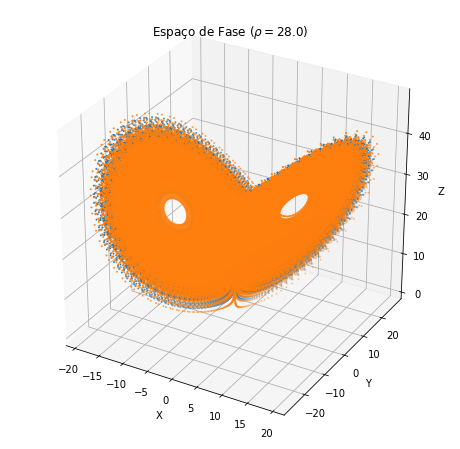

In [12]:
#Plotando Resultados


fig = plt.figure(figsize=(8, 8))
ax= plt.axes(projection = '3d')
ax.scatter3D(s[0],s[1],s[2],s=1) # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
ax.scatter3D(s2[0],s2[1],s2[2],s=1)
plt.title('Espaço de Fase ('r'$\rho= %.1f)$''' %rho)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



Text(0.5, 0, 'Z')

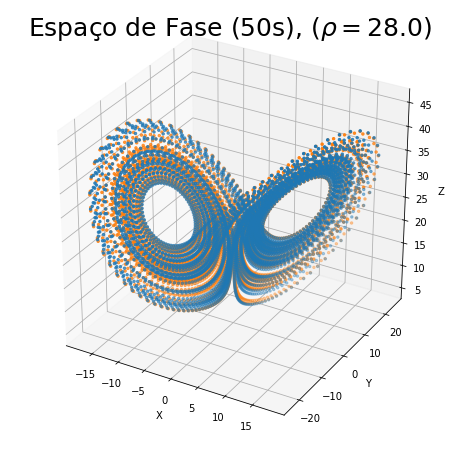

In [13]:
#mesmo plot, mas com menos pontos
a=5000
fig22 = plt.figure(figsize=(8, 8))
ax= plt.axes(projection = '3d')
ax.scatter3D(s[0][0:a],s[1][0:a],s[2][0:a],s=6) # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
ax.scatter3D(s2[0][0:a],s2[1][0:a],s2[2][0:a],s=6)
plt.title('Espaço de Fase (%.0fs), ('r'$\rho= %.1f)$''' %(a*delta_t,rho), size = 25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



Text(0.5, 0, 'Z')

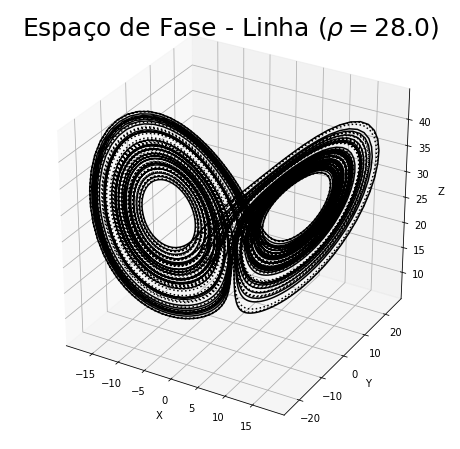

In [14]:
#mesmo plot, com linhas
a1=5000
fig22 = plt.figure(figsize=(8, 8))
ax= plt.axes(projection = '3d')
ax.plot(s[0][0:a1],s[1][0:a1],s[2][0:a1],c='k') # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
ax.plot(s2[0][0:a1],s2[1][0:a1],s2[2][0:a1],c='k', ls = ":")
plt.title('Espaço de Fase - Linha ('r'$\rho= %.1f)$''' %rho, size = 25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')




#### Variável X - Comportamento Temporal

In [15]:
#Especificando Estética: 
 
cbase = 'k' #Cor Referência:
caux = 'r' #Cor Perturbaçao
lsaux = '-' #Linestyle da Solucao Perturbada

a = 5000

figsizebase = (7,2.5)

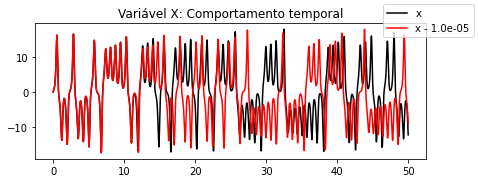

In [16]:
fig2 = plt.figure(figsize= figsizebase)
plt.title('Variável X: Comportamento temporal')
plt.plot(t[0:a],s[0][0:a],label = 'x', c= cbase)
plt.plot(t[0:a],s2[0][0:a],label = 'x - %.1e' %div, c=caux, ls = lsaux)
#plt.xlim(0, 200)
fig2.legend()
plt.show()

#### Variável Y - Comportamento Temporal

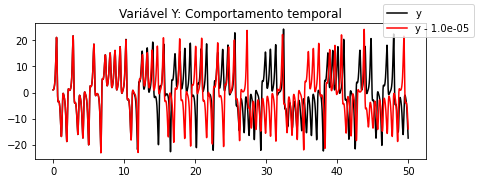

In [17]:
fig21 = plt.figure(figsize= figsizebase)
plt.title('Variável Y: Comportamento temporal')
plt.plot(t[0:a],s[1][0:a],label = 'y', c= cbase)
plt.plot(t[0:a],s2[1][0:a],label = 'y - %.1e' %div, c=caux, ls = lsaux)
#plt.xlim(0, 200)
fig21.legend()
plt.show()

#### Variável Z - Comportamento Temporal

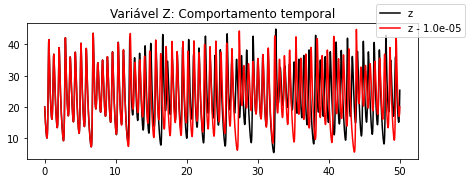

In [18]:
fig20 = plt.figure(figsize= figsizebase)
plt.title('Variável Z: Comportamento temporal')
plt.plot(t[0:a],s[2][0:a],label = 'z', c= cbase)
plt.plot(t[0:a],s2[2][0:a],label = 'z - %.1e' %div, c=caux, ls = lsaux)
#plt.xlim(0, 200)
fig20.legend()
plt.show()

Para estudar a influência dos parâmetros do sistema, é necessário realizar a simulação para distintos parâmetros rô. 

Abaixo, é possível ver o comportamento do sistema sair de estável (rô 10 e 15), para caótico transiente (em rô=20) até comportamento caótico (em rô=28)

In [19]:
lr_x0 = 0.0
lr_y0 = 1.0
lr_z0 = 20.0
lr_s0 = [lr_x0, lr_y0, lr_z0]

#Eixo tempo
t0 = 0.0
tf = 1500.0
delta_t = 0.01

#Resolvendo para distintos rhos:
lista_s = []
lista_t = []
l_rho_i = [10,15,20,28]
for rho_i in l_rho_i:
    f = lambda t, s : lr_model(t, s, k2 = rho_i)
    s_i, t_i = RungeKutta4ord (f, lr_s0, t0, tf, delta_t)
    lista_s.append(s_i)
    lista_t.append(t_i)


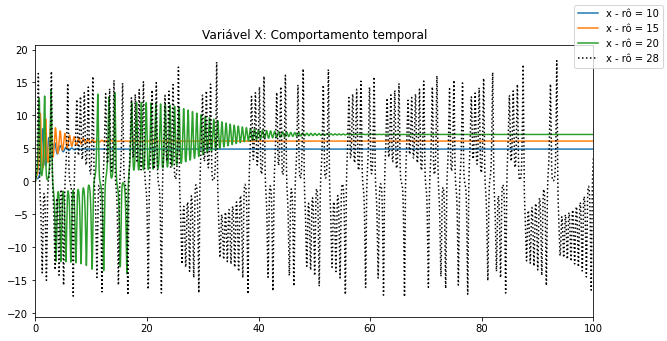

In [20]:
fig_rhos = plt.figure(figsize=(10, 5))
plt.xlim(0,100)
a = 5000
for i in range(0,len(lista_s)):
    
    plt.title('Variável X: Comportamento temporal')
    
    if i == len(lista_s)-1:
        plt.plot(t_i,lista_s[i][0],label = 'x - rô = %.0f' %l_rho_i[i], c='k', ls = ":")
    else:    
        plt.plot(t_i,lista_s[i][0],label = 'x - rô = %.0f' %l_rho_i[i])

fig_rhos.legend()
plt.show()

### Secção de Poincaré:


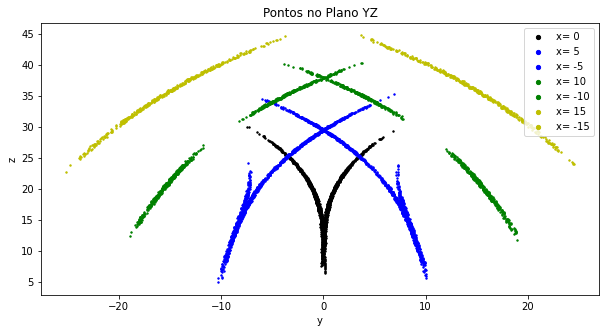

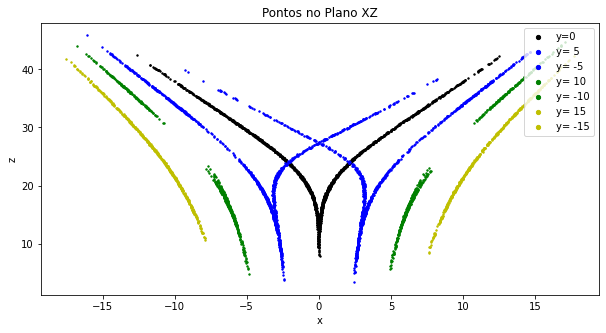

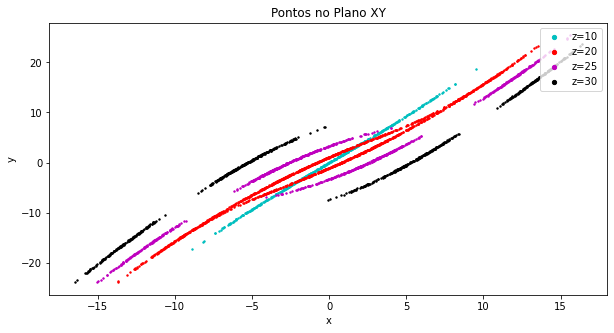

In [87]:
##############SECCAO DE POINCARÉ
    #O criterio "pos" indica  a qual eixo o plano feito será paralelo 0=x (plota yz), 1=y(plota xz), 2=z(plotaxy)
    #O critério "val" indica em que posiçao do eixo o corte será feito
    
#### Seccao Poincaré: Corte no Eixo X: Plano yz (pos=0)


########### PLANO YZ
error = 0.1
pos = 0

val = 0
a = poincare(t, s, pos, val, error)

val2 = 5
a2 = poincare(t, s, pos, val2, error)

val3 = -5
a3 = poincare(t, s, pos, val3, error)

val4 = 10
a4 = poincare(t, s, pos, val4, error)

val5 = -10
a5 = poincare(t, s, pos, val5, error)

val6 = 15
a6 = poincare(t, s, pos, val6, error)

val7 = -15
a7 = poincare(t, s, pos, val7, error)


# Plot
##Critério Plotagem:
tam = 2
fig5 = plt.figure(figsize=(10, 5))
plt.scatter(a[1], a[2], s=tam, c='k', label = 'x= %i' %val)
plt.scatter(a2[1], a2[2], s=tam, c='b',label = 'x= %i' %val2 )
plt.scatter(a3[1], a3[2], s=tam, c='b',label = 'x= %i' %val3)
plt.scatter(a4[1], a4[2], s=tam, c='g',label = 'x= %i' %val4)
plt.scatter(a5[1], a5[2], s=tam, c='g',label = 'x= %i' %val5)
plt.scatter(a6[1], a6[2], s=tam, c='y', label = 'x= %i' %val6)
plt.scatter(a7[1], a7[2], s=tam, c='y', label = 'x= %i' %val7)
plt.title('Pontos no Plano YZ')
plt.xlabel('y')
plt.ylabel('z')
lgnd = plt.legend(markerscale=3.0, fontsize = 10, loc = 'upper right')
plt.show()

########### PLANO XZ
#### Seccao Poincaré: Corte no Eixo y - Plano xz (pos=1)
error = 0.1
pos = 1 

val = 0
b = poincare(t, s, pos, val, error)

val2 = 5
b2 = poincare(t, s, pos, val2, error)

val3 = -5
b3 = poincare(t, s, pos, val3, error)

val4 = 10
b4 = poincare(t, s, pos, val4, error)

val5 = -10
b5 = poincare(t, s, pos, val5, error)

val6 = 15
b6 = poincare(t, s, pos, val6, error)

val7 = -15
b7 = poincare(t, s, pos, val7, error)

# Plot
fig6 = plt.figure(figsize=(10, 5))
plt.scatter(b[0], b[2], s=tam, c='k', label = 'y=%i' %val)
plt.scatter(b2[0], b2[2], s=tam, c='b',label = 'y= %i' %val2 )
plt.scatter(b3[0], b3[2], s=tam, c='b',label = 'y= %i' %val3)
plt.scatter(b4[0], b4[2], s=tam, c='g',label = 'y= %i' %val4)
plt.scatter(b5[0], b5[2], s=tam, c='g',label = 'y= %i' %val5)
plt.scatter(b6[0], b6[2], s=tam, c='y', label = 'y= %i' %val6)
plt.scatter(b7[0], b7[2], s=tam, c='y', label = 'y= %i' %val7)

plt.title('Pontos no Plano XZ')
plt.xlabel('x')
plt.ylabel('z')
lgnd = plt.legend(markerscale=3.0, fontsize = 10, loc = 'upper right')
plt.show()

########### PLANO XY
#### Seccao Poincaré: Corte no Eixo z - Plano xy
pos = 2 #definindo eixo z
error = 0.1

val = 10
c = poincare(t, s, pos, val, error)

val2 = 20
c2 = poincare(t, s, pos, val2, error)

val3 = 25
c3 = poincare(t, s, pos, val3, error)

val4 = 30
c4 = poincare(t, s, pos, val4, error)

# Plot
fig6 = plt.figure(figsize=(10, 5))
plt.scatter(c[0], c[1], s=tam, c='c', label = 'z=%i' %val)
plt.scatter(c2[0], c2[1], s=tam, c='r', label = 'z=%i' %val2)
plt.scatter(c3[0], c3[1], s=tam, c='m', label = 'z=%i' %val3)
plt.scatter(c4[0], c4[1], s=tam, c='k', label = 'z=%i' %val4)
plt.title('Pontos no Plano XY')
plt.xlabel('x')
plt.ylabel('y')
lgnd = plt.legend(markerscale=3.0, fontsize = 10, loc = 'upper right')
plt.show()


array([  0.        ,   0.09481054,   0.1804289 , ..., -10.67742208,
       -11.30855374, -11.93193354])

## Execução Sistema Pêndulo Duplo:

### Cálculo

In [24]:
######EXECUCAO SISTEMA PENDULO DUPLO
    
#Declara Modelo
f3 = lambda t, s : pendulum_model(t, s)

#Eixo tempo
p_t0 = 0.0
p_tf = 150.0
p_delta_t = 0.01

#Condições Iniciais
O10 = math.pi/3 #condição inicial não caótica
#O10 = math.pi
#O10 = math.pi *(5.0/360.0)*2.0
O20 = 0.0
w10 = 0.0
w20 = 0.0

O10_c = math.pi/2 #essa é uma condição inicial caótica.
O20_c = 0.0
w10_c = 0.0
w20_c = 0.0

#perturbacoes
delta2 = 10**-4
#delta2 = math.pi/8
delta3 = 10**-10

## Simulaçoes Periódicas
p_s0 = [O10, O20, w10, w20]

p_s02 = [O10 + delta2, O20, w10, w20]

p_s03 = [O10 + delta3, O20, w10, w20]


##Simulações caóticas
p_s04 = [O10_c, O20_c, w10_c, w20_c]

p_s05 = [O10_c + delta2, O20_c, w10_c, w20_c]

p_s06 = [O10_c + delta3, O20_c, w10_c, w20_c]


In [25]:
#resolvendo Sistemas periodicas
p_s, p_t = RungeKutta4ord (f3, p_s0, p_t0, p_tf, p_delta_t)

p_s2, p_t2 = RungeKutta4ord (f3, p_s02, p_t0, p_tf, p_delta_t)

p_s3, p_t3 = RungeKutta4ord (f3, p_s03, p_t0, p_tf, p_delta_t)

In [26]:
#resolvendo Sistemas caóticos
p_s4, p_t4 = RungeKutta4ord (f3, p_s04, p_t0, p_tf, p_delta_t)

p_s5, p_t5 = RungeKutta4ord (f3, p_s05, p_t0, p_tf, p_delta_t)

p_s6, p_t6 = RungeKutta4ord (f3, p_s06, p_t0, p_tf, p_delta_t)

### Gráficos (Periódicos):

In [27]:
#Especificando Estética: 


cbase = 'k' #Cor Referência:
caux1 = 'grey' #Cor Perturbaçao
caux2 = 'r'

lsbase = '-' #Linestyle da Solucao Perturbada
lsaux = '-' #Linestyle da Solucao Perturbada

lwbase = 1 #Linestyle da Solucao Base
lwaux1 = 7#Linestyle da Solucao Perturbada
lwaux2 = 10 #Linestyle da Solucao Perturbada

transparency = 0.3

#Limite gráficos temporais
lim = len(p_s[0])
#Limite gráficos scatter
lim1 = len(p_s[0])

figsizebase = (15,5)

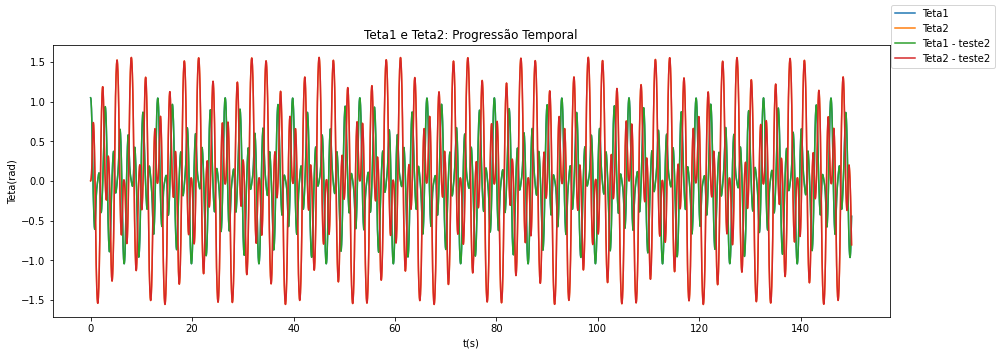

In [28]:
fig7 = plt.figure(figsize= figsizebase)
plt.plot(p_t[0:lim],p_s[0][0:lim],label = 'Teta1')
plt.plot(p_t[0:lim],p_s[1][0:lim],label = 'Teta2')
plt.plot(p_t2[0:lim],p_s2[0][0:lim],label = 'Teta1 - teste2')
plt.plot(p_t2[0:lim],p_s2[1][0:lim],label = 'Teta2 - teste2')
plt.title('Teta1 e Teta2: Progressão Temporal')
plt.xlabel('t(s)')
plt.ylabel('Teta(rad)')
fig7.legend()
plt.show()



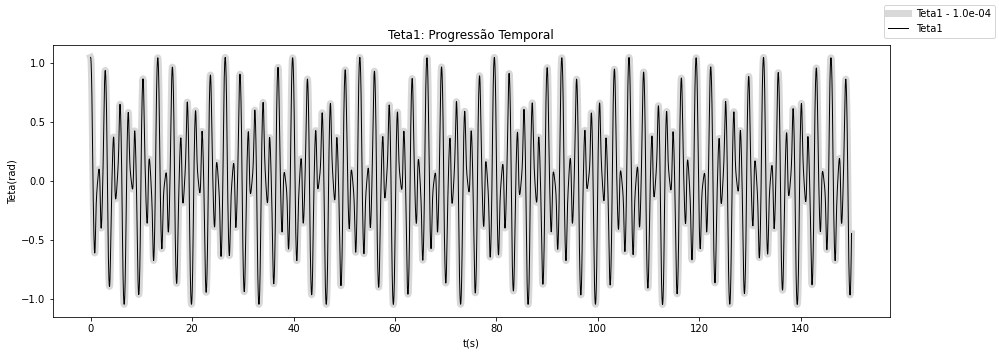

In [29]:
fig17 = plt.figure(figsize=figsizebase)
plt.plot(p_t2[0:lim],p_s2[0][0:lim],label = 'Teta1 - %.1e' %delta2, c=caux1, ls = lsaux, lw = lwaux1, alpha = transparency) 
plt.plot(p_t[0:lim],p_s[0][0:lim],label = 'Teta1', c=cbase, lw = lwbase)
plt.title('Teta1: Progressão Temporal')
plt.xlabel('t(s)')
plt.ylabel('Teta(rad)')
fig17.legend()
plt.show()



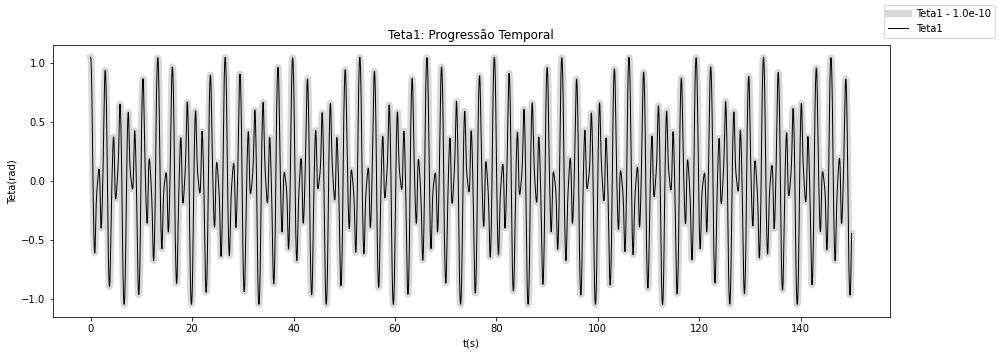

In [30]:
fig17 = plt.figure(figsize=figsizebase)
plt.plot(p_t3[0:lim],p_s3[0][0:lim],label = 'Teta1 - %.1e' %delta3, c=caux1, ls = lsaux, lw = lwaux1, alpha = transparency)
plt.plot(p_t[0:lim],p_s[0][0:lim],label = 'Teta1', c=cbase, lw = lwbase)
plt.title('Teta1: Progressão Temporal')
plt.xlabel('t(s)')
plt.ylabel('Teta(rad)')
fig17.legend()
plt.show()



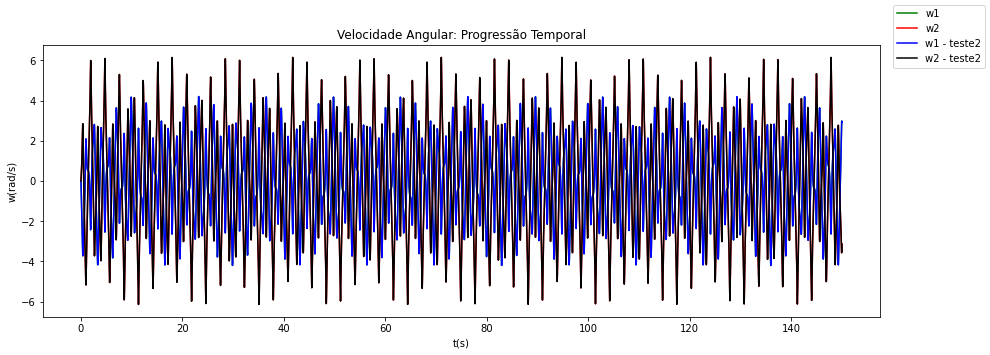

In [31]:
fig9 = plt.figure(figsize=figsizebase)
plt.plot(p_t[0:lim],p_s[2][0:lim],label = 'w1',c='g')
plt.plot(p_t[0:lim],p_s[3][0:lim], label = 'w2',c='r')
plt.plot(p_t2[0:lim],p_s2[2][0:lim],label = 'w1 - teste2',c='b')
plt.plot(p_t2[0:lim],p_s2[3][0:lim], label = 'w2 - teste2',c='k')
plt.title('Velocidade Angular: Progressão Temporal')
plt.xlabel('t(s)')
plt.ylabel('w(rad/s)')
fig9.legend()
plt.show()

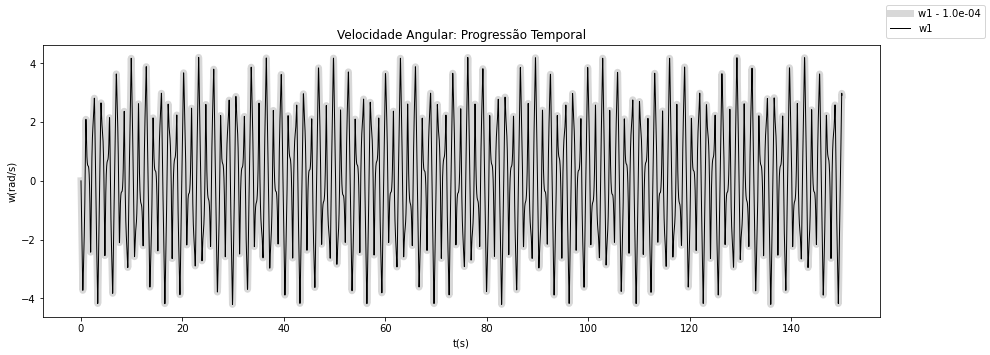

In [32]:
fig19 = plt.figure(figsize=figsizebase)

plt.plot(p_t2[0:lim],p_s2[2][0:lim],label = 'w1 - %.1e' %delta2, c=caux1, ls = lsaux, lw = lwaux1, alpha = transparency)
plt.plot(p_t[0:lim],p_s[2][0:lim],label = 'w1', c=cbase, lw = lwbase)
plt.title('Velocidade Angular: Progressão Temporal')
plt.xlabel('t(s)')
plt.ylabel('w(rad/s)')
fig19.legend()
plt.show()

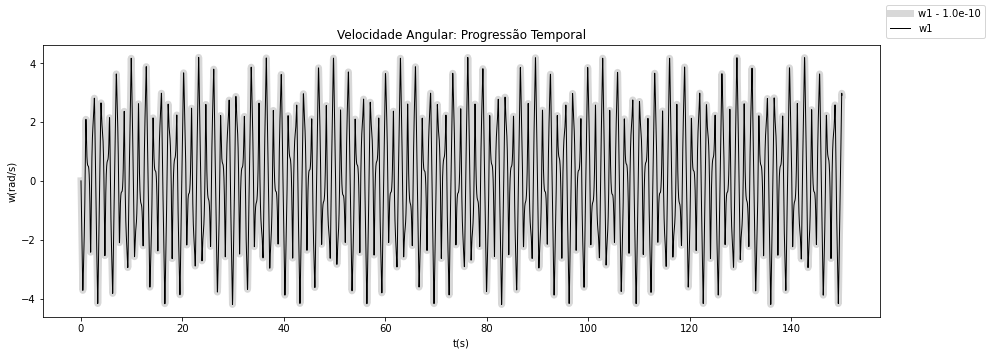

In [33]:
fig20 = plt.figure(figsize=figsizebase)

plt.plot(p_t3[0:lim],p_s3[2][0:lim],label = 'w1 - %.1e' %delta3, c=caux1, ls = lsaux, lw = lwaux1, alpha = transparency)
plt.plot(p_t[0:lim],p_s[2][0:lim],label = 'w1', c=cbase, lw = lwbase)
plt.title('Velocidade Angular: Progressão Temporal')
plt.xlabel('t(s)')
plt.ylabel('w(rad/s)')
fig20.legend()
plt.show()

Text(0, 0.5, 'teta2')

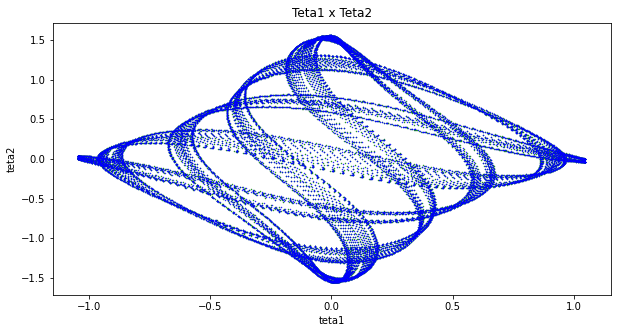

In [34]:
fig8 = plt.figure(figsize=(10, 5))
plt.scatter(p_s[0][0:lim], p_s[1][0:lim], s=0.2, c='g')
plt.scatter(p_s2[0][0:lim], p_s2[1][0:lim], s=0.2, c='b')
plt.title('Teta1 x Teta2')
plt.xlabel('teta1')
plt.ylabel('teta2')

Text(0, 0.5, 'w1')

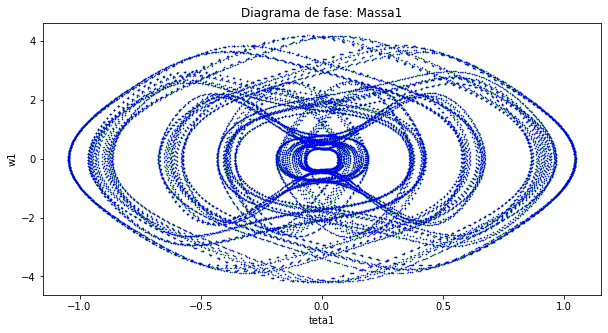

In [35]:
fig11 = plt.figure(figsize=(10, 5))
plt.scatter(p_s[0][0:lim1], p_s[2][0:lim1], s=0.2, c='g')
plt.scatter(p_s2[0][0:lim1], p_s2[2][0:lim1], s=0.2, c='b')
plt.title('Diagrama de fase: Massa1')
plt.xlabel('teta1')
plt.ylabel('w1')

Text(0, 0.5, 'w2')

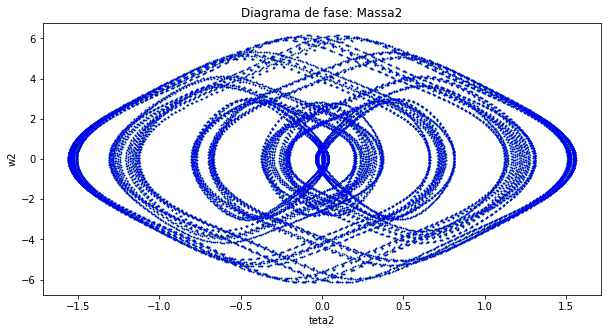

In [36]:
fig12 = plt.figure(figsize=(10, 5))
plt.scatter(p_s[1][0:lim1], p_s[3][0:lim1], s=0.5, c='g')
plt.scatter(p_s2[1][0:lim1], p_s2[3][0:lim1], s=0.5, c='b')
plt.title('Diagrama de fase: Massa2')
plt.xlabel('teta2')
plt.ylabel('w2')

In [37]:
len(p_s[0])

15000

Text(0.5, 0, '$\\omega_1$')

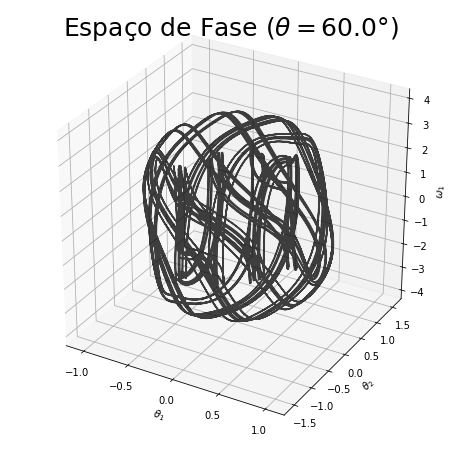

In [38]:
fig35 = plt.figure(figsize=(8, 8))
ax= plt.axes(projection = '3d')
ax.plot(p_s[0][0:lim1],p_s[1][0:lim1],p_s[2][0:lim1],c='k', alpha=0.75) # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
#ax.plot(p_s[0][0:lim1],p_s[1][0:lim1],p_s[2][0:lim1],c='k',label = ''r'$\theta_1$= %.1f°' %(O10*360/(2*math.pi)), alpha=0.75) # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
#ax.plot(p_s3[0][0:lim1],p_s3[1][0:lim1],p_s3[2][0:lim1],c='r',label = ''r'$\theta_1$= %.1f° + %.1e' %(O10*360/(2*math.pi),delta3), alpha=0.5)
#ax.plot(p_s4[0][0:lim1],p_s4[1][0:lim1],p_s4[2][0:lim1],c=caux1)

#ax.plot(p_s4[0],p_s4[1],p_s4[2],c='y')
#ax.plot(p_s2[0][0:a1],p_s2[1][0:a1],p_s2[2][0:a1],c='k', ls = ":")
plt.title('Espaço de Fase ('r'$\theta= %.1f°)$''' %(O10*360/(2*math.pi)), size = 25)
ax.set_xlabel(''r'$\theta_1$')
ax.set_ylabel(''r'$\theta_2$')
ax.set_zlabel(''r'$\omega_1$')

#fig35.legend(loc="upper right", scatterpoints=1, fontsize=10)
#ax.view_init(30,30)

Text(0.5, 0, '$\\omega_1$')

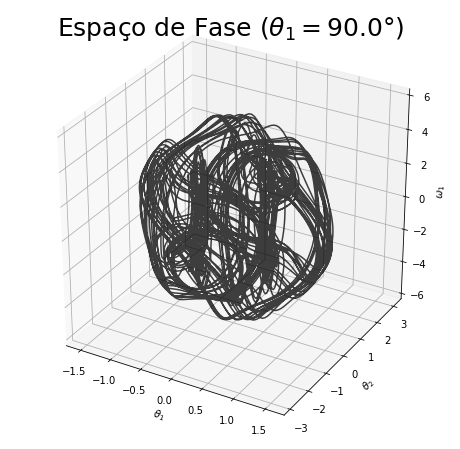

In [39]:
fig35 = plt.figure(figsize=(8, 8))
ax= plt.axes(projection = '3d')
ax.plot(p_s4[0][0:lim1],p_s4[1][0:lim1],p_s4[2][0:lim1],c='k',label = ''r'$\theta_1$= %.1f°' %(O10_c*360/(2*math.pi)), alpha=0.75) # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
#ax.plot(p_s6[0][0:lim1],p_s6[1][0:lim1],p_s6[2][0:lim1],c='r',label = ''r'$\theta_1$= %.1f° + %.1e' %(O10_c*360/(2*math.pi),delta3), alpha=0.5)
#ax.plot(p_s4[0][0:lim1],p_s4[1][0:lim1],p_s4[2][0:lim1],c=caux1)

#ax.plot(p_s4[0],p_s4[1],p_s4[2],c='y')
#ax.plot(p_s2[0][0:a1],p_s2[1][0:a1],p_s2[2][0:a1],c='k', ls = ":")
plt.title('Espaço de Fase ('r'$\theta_1= %.1f°)$''' %(O10_c*360/(2*math.pi)), size = 25)
ax.set_xlabel(''r'$\theta_1$')
ax.set_ylabel(''r'$\theta_2$')
ax.set_zlabel(''r'$\omega_1$')

#fig35.legend(loc="upper right", scatterpoints=1, fontsize=10)

#ax.view_init(30,30)

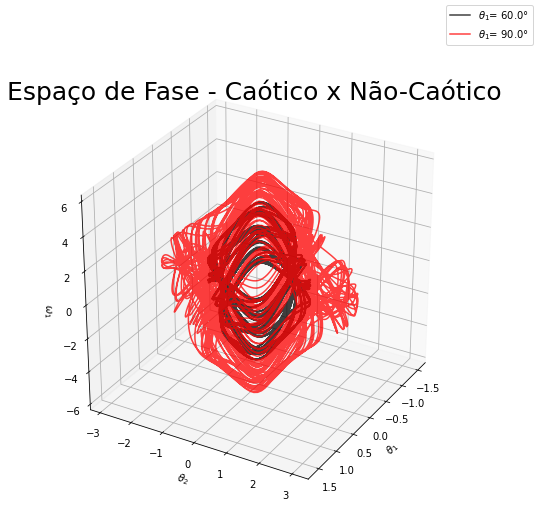

In [40]:
fig35 = plt.figure(figsize=(8, 8))
ax= plt.axes(projection = '3d')
ax.plot(p_s[0][0:lim1],p_s[1][0:lim1],p_s[2][0:lim1],c='k',label = ''r'$\theta_1$= %.1f°' %(O10*360/(2*math.pi)), alpha=0.75) # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
ax.plot(p_s4[0][0:lim1],p_s4[1][0:lim1],p_s4[2][0:lim1],c='r',label = ''r'$\theta_1$= %.1f°' %(O10_c*360/(2*math.pi)), alpha=0.75) # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
#ax.plot(p_s3[0][0:lim1],p_s3[1][0:lim1],p_s3[2][0:lim1],c='r',label = ''r'$\theta_1$= %.1f° + %.1e' %(O10*360/(2*math.pi),delta3), alpha=0.5)
#ax.plot(p_s4[0][0:lim1],p_s4[1][0:lim1],p_s4[2][0:lim1],c=caux1)

#ax.plot(p_s4[0],p_s4[1],p_s4[2],c='y')
#ax.plot(p_s2[0][0:a1],p_s2[1][0:a1],p_s2[2][0:a1],c='k', ls = ":")
plt.title('Espaço de Fase - Caótico x Não-Caótico', size = 25)
ax.set_xlabel(''r'$\theta_1$')
ax.set_ylabel(''r'$\theta_2$')
ax.set_zlabel(''r'$\omega_1$')

fig35.legend(loc="upper right", scatterpoints=1, fontsize=10)
ax.view_init(30,30)

In [130]:
a

array([[ 0.00000000e+00,  9.48105409e-02,  5.09383777e-02, ...,
         6.26545451e-02,  9.00732728e-02, -2.05034432e-02],
       [ 1.00000000e+00,  9.94065353e-01, -3.36847129e+00, ...,
         3.47941381e-01,  3.54138052e-01, -5.40945963e+00],
       [ 2.00000000e+01,  1.94741909e+01,  2.51845435e+01, ...,
         1.55394441e+01,  1.51308005e+01,  2.78741030e+01]])

TypeError: only size-1 arrays can be converted to Python scalars

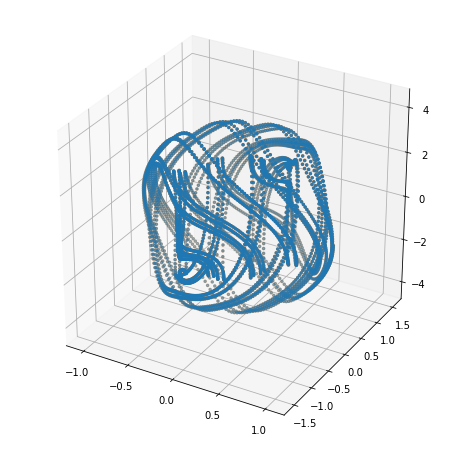

In [127]:
fig36 = plt.figure(figsize=(8, 8))
ax= plt.axes(projection = '3d')
ax.scatter3D(p_s[0][0:a1],p_s[1][0:a1],p_s[2][0:a1],s=6) # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
ax.scatter3D(p_s2[0][0:a1],p_s2[1][0:a1],p_s2[2][0:a1],s=6)
plt.title('Espaço de Fase (%.0fs), ('r'$\theta_1= %.1f)$''' %(a*delta_t,rho), size = 25)
ax.set_xlabel(''r'$\theta_1$')
ax.set_ylabel(''r'$\theta_2$')
ax.set_zlabel(''r'$\omega_1$')

#ax.view_init(45,45)

### Poincaré para Pendulo Duplo

In [43]:
########### PLANO TETA 2 = 0 
#### Seccao Poincaré: Corte no Eixo y - Plano xz (pos=1)
error = 0.001
pos = 1 

val = 0
p_s_poinc_background = poincare(p_t, p_s[0:3], pos, val, error)

In [44]:
eixoy = np.array([0,1,0])
ponto_ref = [0,0,0]

In [45]:
p_s_poinc, p_t_poinc = ponc_esp (s= p_s[0:3], t = p_t, v = eixoy, p0= ponto_ref) 

In [46]:
len(p_s_poinc[:,1])

101

#### Poincaré certo:

In [47]:
#Especificando Estética:
tam = 4
cbase = 'k'
caux = 'grey'

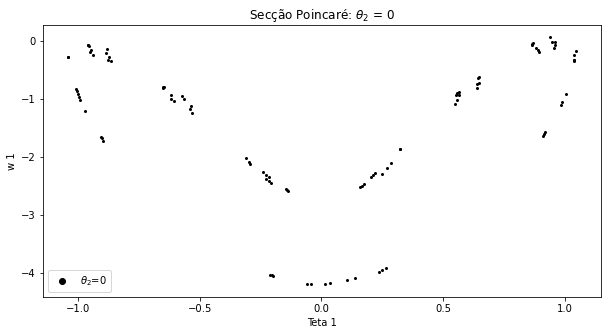

In [48]:
fig_p_s_poinc = plt.figure(figsize=(10, 5))

val_teta2 = 0
#plt.scatter(p_s_poinc_background[0], p_s_poinc_background[2], s=tam, c=caux)
plt.scatter(p_s_poinc[:,0], p_s_poinc[:,2], s=tam, c=cbase, label = ''r'$\theta_2$=%i' %val_teta2)


plt.title('Secção Poincaré: 'r'$\theta_2$ = 0')
plt.xlabel('Teta 1')
plt.ylabel('w 1')
lgnd = plt.legend(markerscale=3.0, fontsize = 10)
#fig_p_s_poinc.legend(loc="upper right", scatterpoints=1, fontsize=10)
plt.show()

### SImulando para diversos angulos iniciais

In [67]:
#Eixo tempo
p_t0_sim = 0.0
p_tf_sim = 150.0
p_delta_t_sim = 0.01

#Condições Iniciais
O10_sim_ini_graus = 30.0 
O10_sim_ini = math.pi *(O10_sim_ini_graus/360.0)*2.0 #condição inicial não caótica
#O10_sim_fim = math.pi/2.0
O10_sim_fim_graus = 90.0
O10_sim_fim = math.pi *(O10_sim_fim_graus/360.0)*2.0
O20_sim = 0.0
w10_sim = 0.0
w20_sim = 0.0

delta_teta1_graus = 15.0
delta_teta1 = math.pi *(delta_teta1_graus/360.0)*2.0

list_tetas1 = np.arange(O10_sim_ini,O10_sim_fim +0.001,delta_teta1).tolist()
list_tetas1_str = [str(round(i*360.0/(math.pi *2.0)))+'°' for i in list_tetas1]

In [68]:
#Declara Modelo
f3 = lambda t, s : pendulum_model(t, s)

p_s_list = [] 
p_t_list = []

for teta1 in list_tetas1:
    
    p_s0_aux = [teta1, O20_sim, w10_sim, w20_sim]
    
    p_s_aux, p_t_aux = RungeKutta4ord (f3, p_s0_aux, p_t0_sim, p_tf_sim, p_delta_t_sim)
    
    p_s_list.append(p_s_aux)
    p_t_list.append(p_t_aux)
    

Plotando Gráficos de theta1: 

In [69]:
len(p_s_list[1][3])

15000

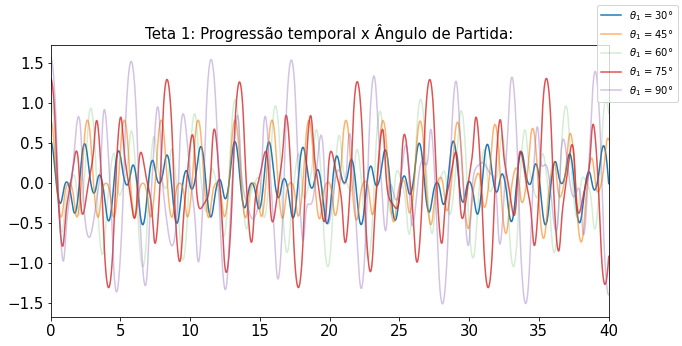

In [70]:
fig_pend_sim_teta1 = plt.figure(figsize=(10, 5))

plt.title('Teta 1: Progressão temporal x Ângulo de Partida:')

plt.xlim(0,+40)

for i in range(0,len(list_tetas1)):
    
    if len(p_s_list[i][0]) == 0:
        continue
    else:
        plt.plot(p_t_list[0],p_s_list[i][0],label = ''r'$\theta_1$ = ' + list_tetas1_str[i], alpha= 2.0*(len(list_tetas1)-i)/len(list_tetas1)) 
        #plt.plot(p_t_list[0],p_s_list[i][0],label = 'Teta = ' + list_tetas1_str[i]) 
    
fig_pend_sim_teta1.legend(loc="upper right", scatterpoints=1, fontsize=10)
plt.show()


C:\Users\joaoc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
No handles with labels found to put in legend.


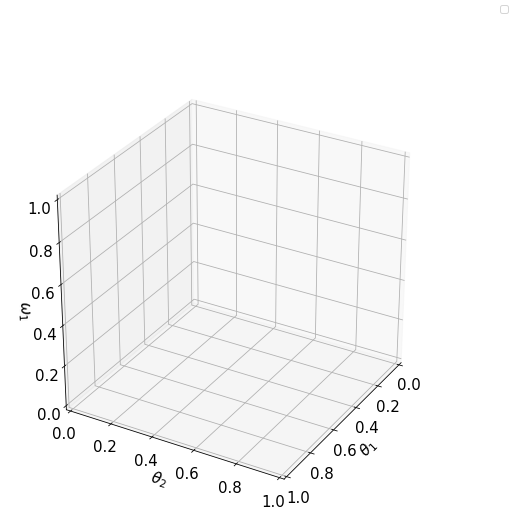

In [71]:
fig_pend_sim_espacofase = plt.figure(figsize=(8, 8))

plt.title('Espaço de Fase - Diferentes Ângulos Iniciais', size = 25)

ax= plt.axes(projection = '3d')

for i in range(10,len(list_tetas1)):
    
    if len(p_s_list[i][0]) == 0:
        continue
    else:
        
        ax.plot(p_s_list[i][0][0:lim],p_s_list[i][1][0:lim],p_s_list[i][2][0:lim],label = ''r'$\theta_1$ = ' + list_tetas1_str[i]) 
        #plt.plot(p_t_list[0],p_s_list[i][0],label = 'Teta = ' + list_tetas1_str[i]) 
    
ax.set_xlabel(''r'$\theta_1$')
ax.set_ylabel(''r'$\theta_2$')
ax.set_zlabel(''r'$\omega_1$')

fig_pend_sim_espacofase.legend(loc="upper right", scatterpoints=1, fontsize=10)

ax.view_init(30,30)
#ax.view_init(190,45)

C:\Users\joaoc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 0, '$\\omega_1$')

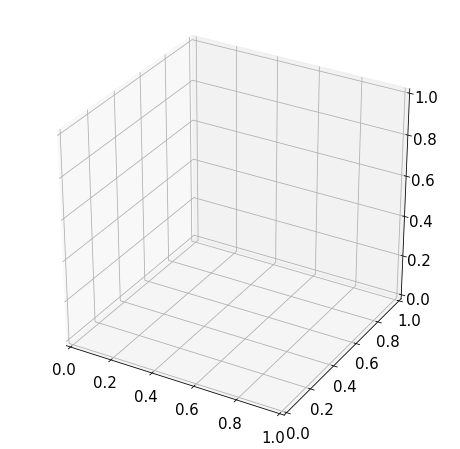

In [72]:
fig_pend_sim_espacofase = plt.figure(figsize=(8, 8))

plt.title('Espaço de Fase - Diferentes Ângulos Iniciais', size = 25)

ax= plt.axes(projection = '3d')

n_linhas = 3
n_colunas = len(list_tetas1)//n_linhas + len(list_tetas1)%n_linhas

for i in range(0,len(list_tetas1)):
    
    if len(p_s_list[i][0]) == 0:
        continue
    else:
        ax = fig.add_subplot(n_linhas, n_colunas, 1+i, projection='3d')
        #ax.plot(p_s_list[i][0][0:lim],p_s_list[i][1][0:lim],p_s_list[i][2][0:lim],label = ''r'$\theta_1$ = ' + list_tetas1_str[i], alpha= 1.8*(len(list_tetas1)-i)/len(list_tetas1)) 
        #plt.plot(p_t_list[0],p_s_list[i][0],label = 'Teta = ' + list_tetas1_str[i]) 
    
ax.set_xlabel(''r'$\theta_1$')
ax.set_ylabel(''r'$\theta_2$')
ax.set_zlabel(''r'$\omega_1$')

#fig_pend_sim_espacofase.legend(loc="upper right", scatterpoints=1, fontsize=10)

#ax.view_init(30,30)
#ax.view_init(190,45)

In [73]:
total = 13
n_linhas = 3
n_colunas = total//n_linhas + total%n_linhas

n_colunas

5

IndexError: list index out of range

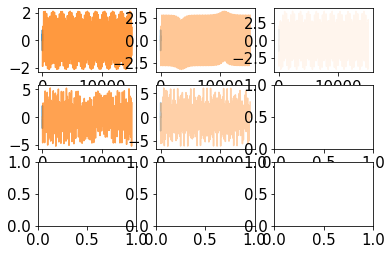

In [74]:
n_linhas = 3
n_colunas = 3

fig, ax = plt.subplots(n_linhas,n_colunas)

aux = 0
for j in range(n_linhas):
    for k in range(n_colunas):
        ax[j,k].plot(p_s_list[aux][0][0:lim],p_s_list[aux][1][0:lim],p_s_list[aux][2][0:lim],label = ''r'$\theta_1$ = ' + list_tetas1_str[aux], alpha= 1.8*(len(list_tetas1)-aux)/len(list_tetas1)) 
        aux = aux + 1
        
fig

In [ ]:
fig_pend_sim_espacofase = plt.figure(figsize=(8, 8))

plt.title('Espaço de Fase - Diferentes Ângulos Iniciais', size = 25)

ax= plt.axes(projection = '3d')

for i in range(0,len(list_tetas1)-11):
    
    if len(p_s_list[i][0]) == 0:
        continue
    else:
        ax.plot(p_s_list[i][0][0:lim],p_s_list[i][1][0:lim],p_s_list[i][2][0:lim],label = ''r'$\theta_1$ = ' + list_tetas1_str[i], alpha= 1.0*(len(list_tetas1)-i)/len(list_tetas1)) 
        #plt.plot(p_t_list[0],p_s_list[i][0],label = 'Teta = ' + list_tetas1_str[i]) 
    
ax.set_xlabel(''r'$\theta_1$')
ax.set_ylabel(''r'$\theta_2$')
ax.set_zlabel(''r'$\omega_1$')

fig_pend_sim_espacofase.legend(loc="upper right", scatterpoints=1, fontsize=10)

ax.view_init(30,30)
#ax.view_init(190,45)

C:\Users\joaoc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
No handles with labels found to put in legend.


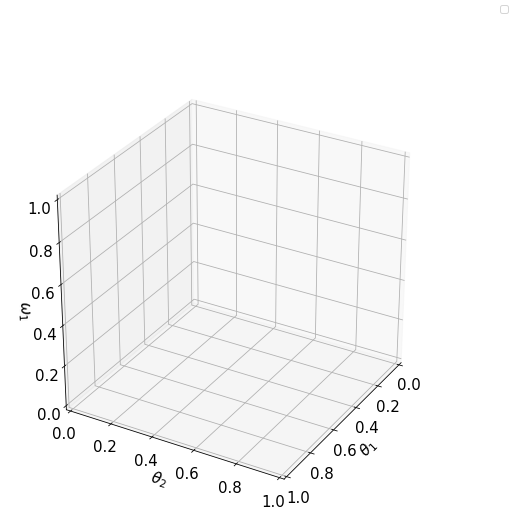

In [75]:
fig_pend_sim_espacofase = plt.figure(figsize=(8, 8))

plt.title('Espaço de Fase - Diferentes Ângulos Iniciais', size = 25)

ax= plt.axes(projection = '3d')

for i in range(4,len(list_tetas1)-11):
    
    if len(p_s_list[i][0]) == 0:
        continue
    else:
        ax.plot(p_s_list[i][0][0:lim],p_s_list[i][1][0:lim],p_s_list[i][2][0:lim],label = ''r'$\theta_1$ = ' + list_tetas1_str[i], alpha= 1.8*(len(list_tetas1)-i)/len(list_tetas1)) 
        #plt.plot(p_t_list[0],p_s_list[i][0],label = 'Teta = ' + list_tetas1_str[i]) 
    
ax.set_xlabel(''r'$\theta_1$')
ax.set_ylabel(''r'$\theta_2$')
ax.set_zlabel(''r'$\omega_1$')

fig_pend_sim_espacofase.legend(loc="upper right", scatterpoints=1, fontsize=10)

ax.view_init(30,30)
#ax.view_init(190,45)

**######IMPORTANTE:#########** 
Inserir disversos gráficos plotados juntos: 
https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

In [76]:
len(p_s_list[i][0][0:25])

25

**Calculando Diversas Seccoes Poincaré:**

In [77]:
eixoy = np.array([0,1,0])
ponto_ref = [0,0,0]

p_s_poinc_list = [] # variavel que armazena as solucoes

#p_s_poinc, p_t_poinc = ponc_esp (s= p_s_list[i][0:3], t = p_t_list[i], v = eixoy, p0= ponto_ref) 

for i in range(0,len(list_tetas1)):
    
    p_s_aux_poinc, p_t_aux_poinc = ponc_esp (s= p_s_list[i][0:3], t = p_t_list[i], v = eixoy, p0= ponto_ref)
    #z_sol_poinc.append(np.array(z_aux_poinc))
    p_s_poinc_list.append(p_s_aux_poinc)
    

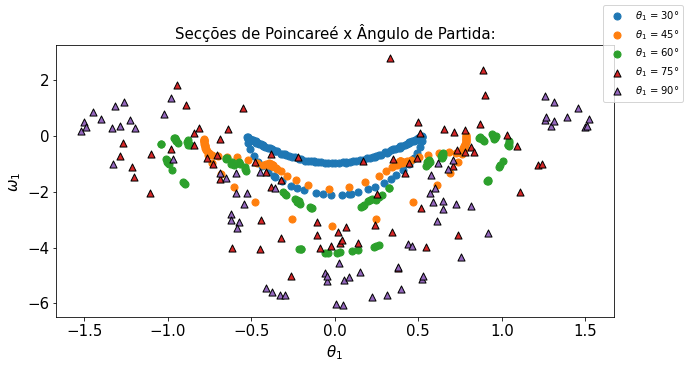

In [78]:
fig_pend_sim_poinc = plt.figure(figsize=(10, 5))

plt.title('Secções de Poincareé x Ângulo de Partida:')

tam = 50

for i in range(0,len(list_tetas1)):
    
    if len(p_s_poinc_list[i]) == 0:
        continue
    elif i <= len(list_tetas1)/2:
        #plt.scatter(p_s_poinc[:,0], p_s_poinc[:,2], s=tam, c=cbase, label = 'Teta2=%i' %val_teta2)
        plt.scatter(p_s_poinc_list[i][:,0], p_s_poinc_list[i][:,2], s=tam, label = ''r'$\theta_1$ = ' + list_tetas1_str[i])
    
    else:
        plt.scatter(p_s_poinc_list[i][:,0], p_s_poinc_list[i][:,2], s=tam, label = ''r'$\theta_1$ = ' + list_tetas1_str[i], marker='^', edgecolors='k')
        #plt.plot(p_t_list[0],p_s_list[i][0],label = 'Teta1 = ' + list_tetas1_str[i], alpha= 2.0*(len(list_tetas1)-i)/len(list_tetas1)) 
        #plt.plot(p_t_list[0],p_s_list[i][0],label = 'Teta = ' + list_tetas1_str[i]) 

plt.xlabel(''r'$\theta_1$ ')
plt.ylabel(''r'$\omega_1$ ')
fig_pend_sim_poinc.legend(loc="upper right", scatterpoints=1, fontsize=10)
plt.show()

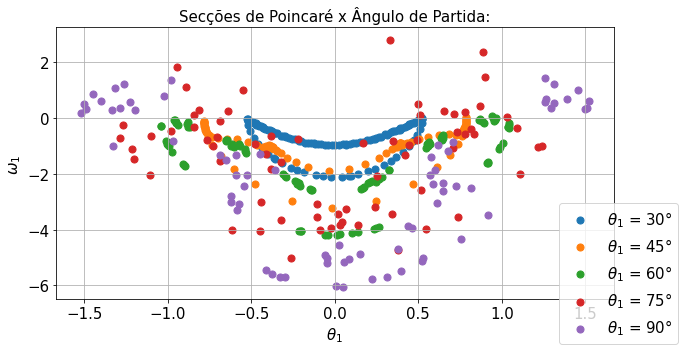

In [79]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title

tam = 50 #tamanho dos pontos

fig_pend_sim_poinc = plt.figure(figsize=(10, 5))

plt.title('Secções de Poincaré x Ângulo de Partida:')

for i in range(0,len(list_tetas1)):
    
    if len(p_s_poinc_list[i]) == 0:
        continue
    else:
        #plt.scatter(p_s_poinc[:,0], p_s_poinc[:,2], s=tam, c=cbase, label = 'Teta2=%i' %val_teta2)
        plt.scatter(p_s_poinc_list[i][:,0], p_s_poinc_list[i][:,2], s=tam, label = ''r'$\theta_1$ = ' + list_tetas1_str[i])
    
plt.xlabel(''r'$\theta_1$ ')
plt.ylabel(''r'$\omega_1$ ')
fig_pend_sim_poinc.legend(loc="lower right", scatterpoints=1)


plt.grid()
plt.show()


IndexError: list index out of range

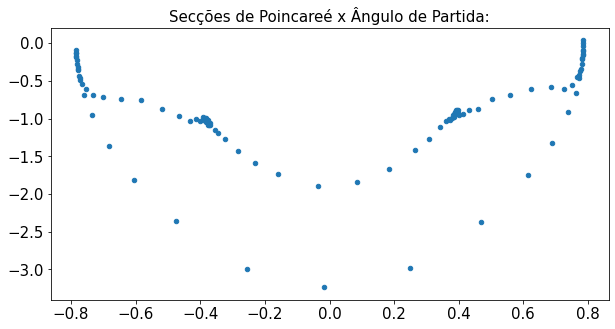

In [80]:
fig_pend_sim_poinc = plt.figure(figsize=(10, 5))

plt.title('Secções de Poincareé x Ângulo de Partida:')

tam = 20

plt.scatter(p_s_poinc_list[1][:,0], p_s_poinc_list[1][:,2], s=tam, label = 'Teta1 = ' + list_tetas1_str[1])

plt.scatter(p_s_poinc_list[17][:,0], p_s_poinc_list[17][:,2], s=tam, label = 'Teta1 = ' + list_tetas1_str[17])

plt.scatter(p_s_poinc_list[9][:,0], p_s_poinc_list[9][:,2], s=tam, label = 'Teta1 = ' + list_tetas1_str[9])

plt.xlabel('Teta 1')
plt.ylabel('w 1')
fig_pend_sim_poinc.legend(loc="upper right", scatterpoints=1, fontsize=10)
plt.show()

### Análise de Convergência

In [434]:
list_passo = [1/(10**i) for i in range(1,4)]
list_passo

p_s_passo_list = [] 
p_t_passo_list = []

O10_passo = math.pi/5.0

for passo in list_passo:
    
    p_s0_passo_aux = [O10_passo, O20_sim, w10_sim, w20_sim]
    
    p_s_passo_aux, p_t_passo_aux = RungeKutta4ord (f3, p_s0_passo_aux, p_t0_sim, p_tf_sim, passo)
    
    p_s_passo_list.append(p_s_passo_aux)
    p_t_passo_list.append(p_t_passo_aux)

## Execução Sistema HIV:

### Cálculo

In [19]:
######EXECUCAO SISTEMA HIV
    
#Declara Modelo
f2 = lambda t, s : model(t, s)

#Eixo tempo
t02 = 0.0
tf2 = 15.0
delta_t2 = 0.01

#Condições Iniciais
x0 = 1e6
y0 = 0
z0 = 100
s0 = [x0, y0, z0]

#resolve o Sistema
s2_hiv, t2_hiv = RungeKutta4ord (f2, s0, t02, tf2, delta_t2)
            

### Gráficos:

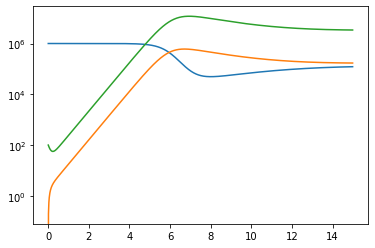

[ 0.  1. 20.]
1.0


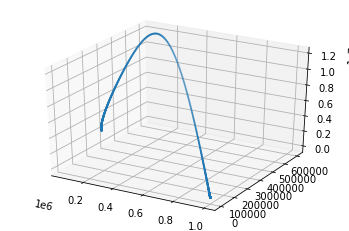

In [20]:
#Plotando Resultados
fig3 = plt.figure()

for i in range (0, len(s0)):

    plt.semilogy(t2_hiv,s2_hiv[i])

plt.show()

fig4 = plt.figure()
ax2= plt.axes(projection = '3d')
ax2.scatter3D(s2_hiv[0],s2_hiv[1],s2_hiv[2],s=1)

print(s[:,0])
print(s[1,0])

# Expoente Lyapunov:

## Cálculo Expoente:

In [45]:
def lyapunov(jacobiano, s, dt):
    #Variável que armazena os autovalores
    autoval = np.zeros((s.shape[0], s.shape[1]))
    
    #Matriz Ortonormal inicial (dimensão tem de ser igual a do sistema):
    w = np.zeros((s.shape[0], s.shape[0]))
    for j in range(w.shape[1]):
        w[j,j] = 1.0

    for i in range(s[0,:].size):    
        #jacobiano em v0:
        J = jacobiano(s[:,i])
        
        #verificar se essa alteração precede. Me parece um pouco estranha
        #ver aqui:https://www.math.tamu.edu/~mpilant/math614/Matlab/Lyapunov/LorenzSpectrum.pdf
        #J = np.identity(s.shape[0])+J_0*dt
        
        #Aplica-se o jacobiano à base ortonormal w, que corresponde às perturbações do sistema: 
        Z = J@w
        
        #Ortonomalizando base pelo método gramschimidt:
        Q,R = gramschmidt(Z)
        
        #nova base ortnormal será a matriz Q
        w = Q
        
        #Variável que armazena os autovalores: 
        for k in range(s.shape[0]): 
            autoval[k,i]= R[k,k]
    
    return autoval 

## Aplicação - Sistema de Lorenz:

TENTATIVA 1: Jacobiano e Gram Schimidt (Decomposição QR): 

In [46]:
#Jacobiano Lorenz:
#
#k1 = 16, k2= 45.92, k3 =4.0
def jac_lor(a, k1 = 10, k2= 28, k3 = 8.0/3.0):
    J = np.zeros((a.size, a.size))
    
    #Linha 1:
    J[0, 0] = -k1
    J[0, 1] = k1
    J[0, 2] = 0
    
    #Linha 2:
    J[1, 0] = k2 - a[2]
    J[1, 1] = -1
    J[1, 2] = -a[0]
    
    #Linha 3:
    J[2, 0] = a[1]
    J[2, 1] = a[0]
    J[2, 2] = -k3 

    return J

A será o vetor com todos os autovalores obtidos na operação:

In [47]:
a = lyapunov(jac_lor,s, delta_t)
#Pendência: Definir como passar uma funcção e seus parametros como parametro de uma outra função

O Expoente de Lyapunov seria, então, dado por: 

In [48]:
lmbda = 0
for i in range(a.shape[1]):
    lmbda = lmbda + np.log(a[0,i]) 
    # o termo 0 deveria ser o expoente da direção principal, que é ~2,16
    #o termo 1 seria o expoente na segunda direção, que deveria ser ~0
    # o da terceira dimensão deveria ser ~-14
    
lmbda/((a.shape[1]-1))

2.6345975260747823

TENTATIVA 2: Cálculo do Coeficiente angular da reta que melhor aproxima a evolução da divergência entre casos:

Teoricamente, o vetor inclin deveria ter, como primeiro paramentro, o coeficiente linear da linha usada para aproximar. E, portanto, deveria representar o expoente de Lyapunov

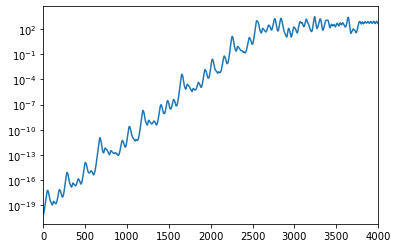

array([  1.83420198, -43.7819239 ])

In [49]:
vetor = ((s - s2)**2)
vetor_dif = np.zeros(vetor.shape[1])
lim = 2500
for i in range(s.shape[1]):
    soma = 0
    
    for j in range(s.shape[0]):
        soma = soma + (s[j,i]-s2[j,i])**2
    
    vetor_dif[i] = soma
    
fig = plt.figure()
plt.xlim(0,4000)
plt.semilogy(vetor_dif)    

plt.show()
        
#d = sqrt(abs(x1-x2).^2 + abs(y1-y2).^2 + abs(z1-z2).^2);
#semilogy(d)
#xlabel('time')
#title('magnitude of separation of nearby Lorenz trajectories')
vetor.shape[1]    
vetor_dif2 = vetor_dif[0:lim]
t_alt = t[0:lim]

inclin = np.polyfit(t_alt, np.log(vetor_dif2),1)

inclin


No caso deste método apresnetar erro, executar a opção 

O Expoente de Lyapunov, por esse método, seria:

In [50]:
inclin[0]

1.8342019805813432

# Poincaré - Especial: 

In [24]:
#Vetores normais aos planos de corte
eixox = np.array([1,0,0])
eixoy = np.array([0,1,0])
eixoz = np.array([0,0,1])
outro = np.array([1,1,1])

In [25]:
x_corteini = -15
x_cortefim = +15
x_intcorte = 5

y_corteini = -15
y_cortefim = +15
y_intcorte = 5

z_corteini = 0
z_cortefim = +40
z_intcorte = 5

#lista de todos os pontos para o qual queremos plotar
## Eixo X
x_list_pref = [[i,0,0] for i in range(x_corteini,x_cortefim + 1,x_intcorte)]
## Eixo Y
y_list_pref = [[0,i,0] for i in range(y_corteini,y_cortefim + 1,y_intcorte)]
## Eixo Z
z_list_pref = [[0,0,i] for i in range(z_corteini,z_cortefim + 1,z_intcorte)]


In [26]:
#Executando para X
x_aux_poinc = [] #variavel auxiliar para execução do codigo 
x_taux_poinc = [] #variavel auxiliar que receberá o valor do instante temporal
x_sol_poinc = [] # variavel que armazena as solucoes

for k in x_list_pref:
    
    x_aux_poinc, x_taux_poinc = ponc_esp (s= s, t = t, v = eixox, p0= k)  
    x_sol_poinc.append(np.array(x_aux_poinc))

In [27]:
#Executando para Y

y_aux_poinc = [] #variavel auxiliar para execução do codigo 
y_taux_poinc = [] #variavel auxiliar que receberá o valor do instante temporal
y_sol_poinc = [] # variavel que armazena as solucoes

for k in y_list_pref:
    
    y_aux_poinc, y_taux_poinc = ponc_esp (s= s, t = t, v = eixoy, p0= k)  
    y_sol_poinc.append(np.array(y_aux_poinc))

In [28]:
#Executando para Z

z_aux_poinc = [] #variavel auxiliar para execução do codigo 
z_taux_poinc = [] #variavel auxiliar que receberá o valor do instante temporal
z_sol_poinc = [] # variavel que armazena as solucoes

for k in z_list_pref:
    
    z_aux_poinc, z_taux_poinc = ponc_esp (s= s, t = t, v = eixoz, p0= k)  
    #z_sol_poinc.append(np.array(z_aux_poinc))
    z_sol_poinc.append(z_aux_poinc)

In [29]:
z_list_pref
#len(eixoz)
len(y_sol_poinc[3])
#len(z_sol_poinc[5])
#x_sol_poinc[:,1]
#x_sol_poinc[1][:,0]
len(z_sol_poinc[4][:,2])
#lr_ponc2[1]
#len(z_sol_poinc)
#len(z_sol_poinc[1][:,0])

len(z_sol_poinc[4][:,2])

1878

In [144]:
vals
len(x_sol_poinc[3])
#x_sol_poinc[1][:,1]

427

In [77]:
#Especificações Plotagem: 
tam = 20
tamfim = 100

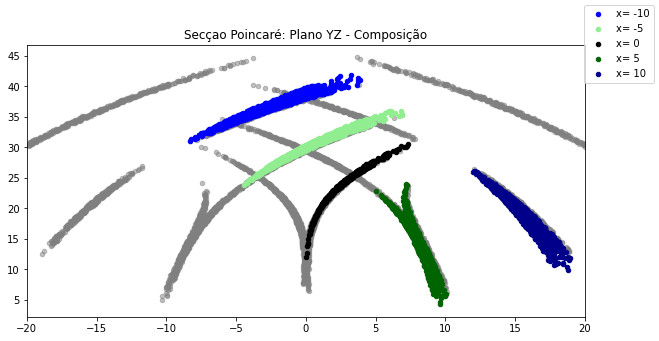

In [82]:
## PLOTANDO RESULTADO DE X


fig_x_poinc = plt.figure(figsize=(10, 5))
plt.xlim(-20,+20)

vals = list_pref = [i for i in range(x_corteini,x_cortefim + 1,x_intcorte)]
cores = ['red','blue','lightgreen','black','darkgreen','darkblue','darkred']

plotar = [-10, -5, 0, 5, 10]



plt.scatter(a[1], a[2], s=tam,c='grey', alpha = 0.5)
plt.scatter(a2[1], a2[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(a3[1], a3[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(a4[1], a4[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(a5[1], a5[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(a6[1], a6[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(a7[1], a7[2], s=tam, c='grey', alpha = 0.5) 


for i in range(0,len(x_sol_poinc)):
    
    plt.title('Secçao Poincaré: Plano YZ - Composição')
    
    if vals[i] in plotar:
    
        if len(x_sol_poinc[i]) == 0:
            continue
        #if i == len(lista_s)-1:
            #plt.plot(t_i,lista_s[i][0],label = 'x - rô = %.0f' %l_rho_i[i], c='k', ls = ":")
            #plt.scatter(x_sol_poinc[i][:,1], x_sol_poinc[i][:,2], s=tam, label = 'x= %i' %vals[i])
        else:    
            #plt.plot(t_i,lista_s[i][0],label = 'x - rô = %.0f' %l_rho_i[i])
            plt.scatter(x_sol_poinc[i][:,1], x_sol_poinc[i][:,2], s=tam, label = 'x= %i' %vals[i], c = cores[i])
            #lr_ponc[:,1]
            #x_sol_poinc[i][:,1]
    else: 
        next
        
#Plotando o ultimo ponto da Série (equilibrio para casos não caótiocos)        
#plt.scatter (s[1][-1],s[2][-1],s = tamfim, label = 'Última Leitura',marker='^', c = 'y' ,edgecolors='k' )        
        
#fig_x_poinc.legend(loc="upper right", markerscale=5., scatterpoints=1, fontsize=10)
fig_x_poinc.legend(loc="upper right", scatterpoints=1, fontsize=10)


plt.xlim(-20,20)
#plt.set_xlim(-20,20)
#plt.set_ylim(0,150)



plt.show()

In [42]:
vals

[-15, -10, -5, 0, 5, 10, 15]

In [147]:
s[0][-1]
s[1][-1]
s[2][-1]

23.030961646905297

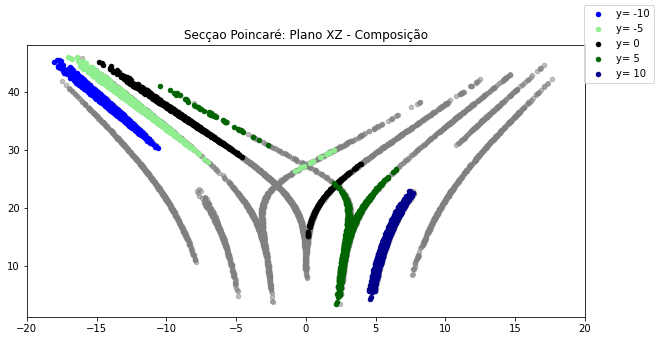

In [85]:
## PLOTANDO RESULTADO DE Y


fig_y_poinc = plt.figure(figsize=(10, 5))
plt.xlim(-20,+20)

vals = list_pref = [i for i in range(y_corteini,y_cortefim + 1,y_intcorte)]
cores = ['red','blue','lightgreen','black','darkgreen','darkblue','darkred']

plotar = [-10, -5, 0, 5, 10]


plt.scatter(b[0], b[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(b2[0], b2[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(b3[0], b3[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(b4[0], b4[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(b5[0], b5[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(b6[0], b6[2], s=tam, c='grey', alpha = 0.5)
plt.scatter(b7[0], b7[2], s=tam, c='grey', alpha = 0.5)



for i in range(0,len(y_sol_poinc)):
    
    plt.title('Secçao Poincaré: Plano XZ - Composição')
    
    if vals[i] in plotar:
    
        if len(y_sol_poinc[i]) == 0:
            continue
        #if i == len(lista_s)-1:
            #plt.plot(t_i,lista_s[i][0],label = 'x - rô = %.0f' %l_rho_i[i], c='k', ls = ":")
            #plt.scatter(y_sol_poinc[i][:,0], y_sol_poinc[i][:,2], s=tam, label = 'y= %i' %vals[i])
        else:    
            #plt.plot(t_i,lista_s[i][0],label = 'x - rô = %.0f' %l_rho_i[i])
            plt.scatter(y_sol_poinc[i][:,0], y_sol_poinc[i][:,2], s=tam, label = 'y= %i' %vals[i], c = cores[i])
            #lr_ponc[:,1]
            #x_sol_poinc[i][:,1]
    else: 
        next
        
#plt.scatter (s[0][-1],s[2][-1],s = tamfim, label = 'Última Leitura',marker='^', c = 'y' ,edgecolors='k' )

#fig_y_poinc.legend(loc="upper right", markerscale=5., scatterpoints=1, fontsize=10)
fig_y_poinc.legend(loc="upper right", scatterpoints=1, fontsize=10)
plt.show()

In [75]:
tam = 20
tamfim = 100

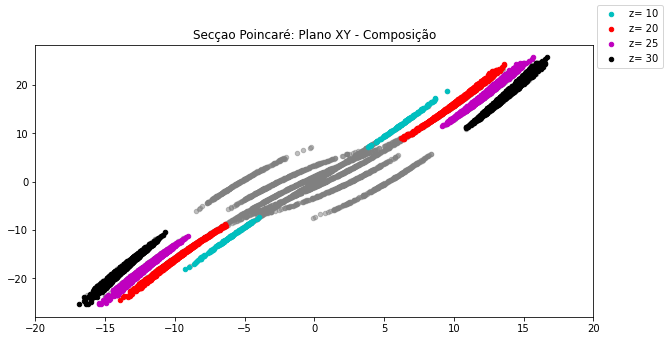

In [86]:
## PLOTANDO RESULTADO DE Z


fig_z_poinc = plt.figure(figsize=(10, 5))
plt.xlim(-20,+20)

vals = list_pref = [i for i in range(z_corteini,z_cortefim + 1,z_intcorte)]

cores = ['red','blue','c','black','r','m','k']

plotar = [10, 20, 25, 30]



plt.scatter(c[0], c[1], s=tam, c='grey', alpha = 0.5)
plt.scatter(c2[0], c2[1], s=tam, c='grey', alpha = 0.5)
plt.scatter(c3[0], c3[1], s=tam, c='grey', alpha = 0.5)
plt.scatter(c4[0], c4[1], s=tam, c='grey', alpha = 0.5)

for i in range(0,len(z_sol_poinc)):
    
    plt.title('Secçao Poincaré: Plano XY - Composição')
    
    if vals[i] in plotar: 
    
        if len(z_sol_poinc[i])>=1:
            if len(z_sol_poinc[i]) == 0:
                continue
                #if i == len(lista_s)-1:
                #plt.plot(t_i,lista_s[i][0],label = 'x - rô = %.0f' %l_rho_i[i], c='k', ls = ":")
                #plt.scatter(z_sol_poinc[i][:,0], z_sol_poinc[i][:,1], s=tam, label = 'z= %i' %vals[i])
            else:    
                #plt.plot(t_i,lista_s[i][0],label = 'x - rô = %.0f' %l_rho_i[i])
                plt.scatter(z_sol_poinc[i][:,0], z_sol_poinc[i][:,1], s=tam, label = 'z= %i' %vals[i], c = cores[i])
                #lr_ponc[:,1]
                #x_sol_poinc[i][:,1]
        else:
            next
    else: 
        next
            
#plt.scatter (s[0][-1],s[1][-1],s = tamfim, label = 'Última Leitura',marker='^', c = 'y' ,edgecolors='k' )  

#fig_z_poinc.legend(loc="upper right", markerscale=5., scatterpoints=1, fontsize=10)
fig_z_poinc.legend(loc="upper right", scatterpoints=1, fontsize=10)
plt.show()

In [48]:
vals
if 15 in vals:
    print("ok")

ok


In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(13,4))
ax1, ax2, ax3 = axs


##Corte em YZ
plt.scatter(x_sol_poinc[i][:,1], x_sol_poinc[i][:,2], s=tam, label = 'x= %i' %vals[i])
ax1.scatter(x_sol_poinc[i][:,1], x_sol_poinc[i][:,2], s=tam, label = 'x= %i' %vals[i])
ax1.plot(eixot,sol[0], c="b", label='x')
ax1.plot(eixot,sol[1],c="r", label='y');
ax1.plot(eixot,sol[2], c="y", label='z');

ax2.plot(eixot,ly_exp[0], c="b", label='x');
ax2.plot(eixot,ly_exp[1],c="r", label='y');
ax2.plot(eixot,ly_exp[2], c="y", label='z');

ax3.plot(eixot,ly_exp[0], c="b", label='x');
ax3.plot(eixot,ly_exp[1],c="r", label='y');
ax3.plot(eixot,ly_exp[2], c="y", label='z');

for ax in axs:
    ax.set_xlabel("t")
    ax.grid()
    ax.legend()

ax1.set_title("COmportamento do Sistema - Variáveis no Tempo")
ax2.set_title("Expoentes de Lyapunov")
ax3.set_title("Expoentes de Lyapunov - Zoom")

ax1.set_xlim(0,60)
ax3.set_xlim(0,150)
ax3.set_ylim(-2,2)